<a href="https://colab.research.google.com/github/AzizahBsyrh/FSD_RegresiLinear_24523238_24523050/blob/main/RegresiLinear_FSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama:

*   Nur Azizah Basyirah Syamsuddin (2423238)
*   Naila Reyhantyas Nurkhalisha (24523050)



**1. Persiapan Data**

**Import lib**
*   pandas as pd untuk mengimpor library pandas untuk bekerja dengan data dalam bentuk DataFrame
*   numpy as np untuk mengimpor library numpy untuk operasi numerik
*   matplotlib.pyplot as plt untuk mengimpor modul pyplot dari matplotlib untuk membuat visualisasi data
*   train_test_split dari sklearn.model_linear_modelselection untuk mengimpor fungsi untuk membagi dataset menjadi data pelatihan dan data pengujian
*   LinearRegression dari sklearn.linear_model untuk mengimpor model regresi linear dari scikit-learn
*   mean_squared_error, r2_score dari sklearn.metrics untuk mengimpor metrik untuk mengevaluasi performa model, yaitu Mean Squared Error (MSE) dan R2 Score

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Pilih dataset publik**

Kami memilih Energy Efficiency Dataset

Kode ini mengunduh file Excel dari URL yang diberikan dan memuatnya ke dalam DataFrame pandas bernama df.

In [172]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240522153920/ENB2012_data%5B1%5D.xlsx'
df = pd.read_excel(url)

**Deskripsi dataset**



*   Dataset Source: Energy Efficiency Dataset
*   Labels: Continuous values representing heating and cooling loads (energy efficiency measures).


*   Size: 768 samples each with 8 attributes.
*   Data: Numerical data





**2. Eksplorasi Data (EDA)**

**Tampilan beberapa baris data**

Kode display(df.head()) digunakan untuk menampilkan lima baris pertama dari DataFrame df.




In [173]:
display(df.head())

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


**Visualisasi hubungan antara variabel independen dan dependen**



*   plt.figure(figsize=(8, 6)): Baris ini membuat sebuah "kanvas kosong" untuk menggambar plot. Ukuran kanvasnya ditentukan oleh figsize, yaitu 8 inci lebarnya dan 6 inci tingginya.
*   plt.scatter(df['X1'], df['Y1'], alpha=0.6): Ini adalah perintah utama untuk membuat scatter plot.
*   df['X1'] adalah data yang akan menjadi titik-titik di sumbu X. Dalam kasus ini, data dari kolom 'X1' (Relative Compactness).
*   df['Y1'] adalah data yang akan menjadi titik-titik di sumbu Y. Dalam kasus ini, data dari kolom 'Y1' (Heating Load).
*   alpha=0.6 mengatur tingkat transparansi titik-titik. Nilai 0.6 berarti titik-titik akan sedikit transparan, jadi jika ada banyak titik yang bertumpuk, kita masih bisa melihatnya.
*   plt.title('X1 (Relative Compactness) vs Y1 (Heating Load)'): Menambahkan judul pada plot agar kita tahu apa yang divisualisasikan
*   plt.xlabel('X1 (Relative Compactness)'): Memberi label pada sumbu X.
*   plt.ylabel('Y1 (Heating Load)'): Memberi label pada sumbu Y.
*   plt.grid(True): Menampilkan grid (garis-garis kotak) di plot untuk membantu membaca nilai-nilai.
*   plt.show(): Menampilkan plot yang sudah selesai dibuat.










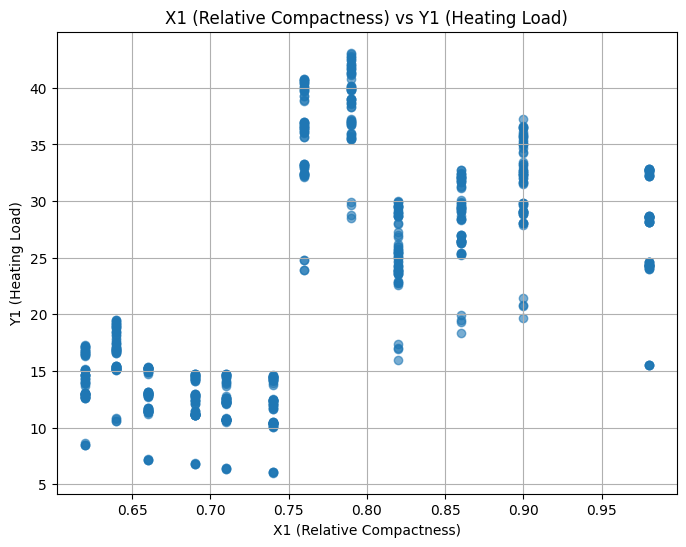

In [174]:
plt.figure(figsize=(8, 6))
plt.scatter(df['X1'], df['Y1'], alpha=0.6)
plt.title('X1 (Relative Compactness) vs Y1 (Heating Load)')
plt.xlabel('X1 (Relative Compactness)')
plt.ylabel('Y1 (Heating Load)')
plt.grid(True)
plt.show()

**3. Pembangunan Model**

**Gunakan LinearRegression dari sklearn.linear_model**

model = LinearRegression()

Kode ini berfungsi untuk membuat sebuah objek model regresi linear baru.

LinearRegression() adalah "cetakan" atau "kelas" dari library scikit-learn (sklearn.linear_model) yang kita impor sebelumnya. Cetakan ini berisi semua fungsi dan logika yang dibutuhkan untuk melakukan regresi linear.
model = ... ini adalah proses pembuatan "instance" atau objek nyata dari cetakan tersebut. Objek ini kita beri nama model.

In [175]:
model = LinearRegression()

**Pisahkan data menjadi training dan testing set**

Kode ini bertujuan untuk membagi dataset kita menjadi dua bagian utama: satu untuk melatih model (training set) dan satu lagi untuk menguji seberapa baik model yang sudah dilatih (testing set).

X = df.drop(['Y1', 'Y2'], axis=1): Baris ini membuat DataFrame baru bernama X. DataFrame X ini berisi semua kolom dari DataFrame df kecuali kolom 'Y1' dan 'Y2'.

axis=1 menunjukkan bahwa kita ingin menghapus kolom (bukan baris). Jadi, X berisi variabel-variabel independen atau fitur yang akan digunakan untuk memprediksi.


y = df['Y1']: Baris ini membuat Series (seperti satu kolom) baru bernama y. y ini berisi data dari kolom 'Y1' saja. Kolom 'Y1' adalah variabel dependen atau target yang ingin kita prediksi (Heating Load).


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42): Ini adalah bagian inti dari pembagian data.


train_test_split() adalah fungsi dari scikit-learn yang kita impor sebelumnya.

Argumen pertama (X) adalah data fitur.
Argumen kedua (y) adalah data target.

test_size=0.3: Ini menentukan proporsi data yang akan dialokasikan untuk set pengujian (testing set). Dalam kasus ini, 30% dari total data akan menjadi data pengujian, dan sisanya 70% akan menjadi data pelatihan.

random_state=42: Ini adalah angka acak yang digunakan untuk menginisialisasi pembagian. Menggunakan angka yang sama setiap kali menjalankan kode akan memastikan bahwa pembagian data hasilnya selalu sama (reproducible).
Hasil dari fungsi ini adalah empat variabel:
X_train: Fitur untuk data pelatihan.
X_test: Fitur untuk data pengujian.
y_train: Target untuk data pelatihan.
y_test: Target untuk data pengujian.


print("Shape of X_train:", X_train.shape) dan seterusnya: Baris-baris ini mencetak bentuk (jumlah baris dan kolom) dari masing-masing set data yang baru saja dibuat. Ini berguna untuk memverifikasi bahwa pembagian data telah dilakukan dengan benar dan jumlah sampel di setiap set sesuai dengan proporsi yang ditentukan.

In [176]:
X = df.drop(['Y1', 'Y2'], axis=1)
y = df['Y1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (537, 8)
Shape of X_test: (231, 8)
Shape of y_train: (537,)
Shape of y_test: (231,)


**Latih model dengan data training**

model.fit(X_train, y_train)

> Baris kode ini menggunakan objek model (yang sebelumnya kita buat menggunakan LinearRegression()) dan melatihnya menggunakan data pelatihan:

X_train: Ini adalah data fitur (variabel independen) yang kita pisahkan sebelumnya untuk pelatihan.
y_train: Ini adalah data target (variabel dependen) yang sesuai dengan X_train, yang juga kita pisahkan sebelumnya.
Metode .fit() pada objek model inilah yang melakukan proses pembelajaran. Di balik layar, model akan mencari pola dan hubungan antara X_train dan y_train untuk menemukan koefisien (slope) dan intercept terbaik yang bisa menjelaskan hubungan linear antara fitur dan target dalam data pelatihan.

print("Model berhasil dilatih!")

> Setelah proses .fit() selesai, baris ini hanya mencetak pesan untuk memberitahukan bahwa model sudah selesai dilatih dan siap untuk digunakan membuat prediksi atau dievaluasi.

In [177]:
model.fit(X_train, y_train)
print("Model berhasil dilatih!")

Model berhasil dilatih!


**4. Evaluasi Model**

**Prediksi pada data testing**

Kode ini digunakan untuk melakukan prediksi menggunakan model regresi linear yang telah dilatih sebelumnya. Model menggunakan data fitur dari set pengujian (X_test) sebagai input untuk menghasilkan nilai prediksi untuk variabel dependen (y_pred).

Kode ini menggunakan metode .predict() pada objek model untuk menjalankan proses prediksi. Hasil prediksi disimpan dalam variabel y_pred.

In [178]:
y_pred = model.predict(X_test)

**Nilai koefisien regresi (slope & intercept)**

Kode ini mencetak nilai koefisien (slope) dan intercept dari model regresi linear yang telah dilatih.

Slope menunjukkan seberapa besar perubahan pada variabel dependen (Y1) untuk setiap perubahan satu unit pada variabel independen (fitur-fitur X), sedangkan intercept menunjukkan nilai prediksi Y1 ketika semua variabel independen bernilai nol.

In [179]:
print("Slope:")
print(model.coef_)
print("\nIntercept:")
print(model.intercept_)

Slope:
[-6.38718602e+01 -6.19774835e-02  3.72259879e-02 -4.96017357e-02
  4.12550582e+00 -2.35796468e-02  1.99266649e+01  2.30732779e-01]

Intercept:
82.68070734336833


**Mean Squared Error (MSE)**

Kode ini menghitung Mean Squared Error (MSE), yaitu rata-rata dari kuadrat selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred).
MSE adalah metrik untuk mengukur seberapa dekat prediksi model dengan nilai sebenarnya.
Kode ini menggunakan fungsi mean_squared_error() untuk melakukan perhitungan tersebut dan kemudian mencetak hasilnya

In [180]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

Mean Squared Error (MSE): 8.839515947384639
R2 Score: 0.9128230460075941


**5. Visualisasi Hasil**

**Plot garis regresi dan titik data aktual**

Kode ini digunakan untuk membuat visualisasi yang membandingkan nilai aktual dari target (Y1) dengan nilai yang diprediksi oleh model regresi linear kita (y_pred).

1. plt.figure(figsize=(10, 7)): Membuat "kanvas" baru untuk plot dengan ukuran lebar 10 inci dan tinggi 7 inci.
2. plt.scatter(y_test, y_pred, color='black', alpha=0.6, label='Data Aktual vs Prediksi'): Membuat diagram pencar (scatter plot).
3. y_test: Data di sumbu X, yaitu nilai Y1 yang sebenarnya (aktual) dari data pengujian.
4. y_pred: Data di sumbu Y, yaitu nilai Y1 yang diprediksi oleh model untuk data pengujian yang sama.
5. color='red': Mengatur warna titik-titik menjadi hitam.
6. alpha=0.6: Mengatur transparansi titik-titik agar tumpukan titik terlihat.
7. label='Data Aktual vs Prediksi': Memberi label pada titik-titik ini untuk legenda.
8. plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=3, label='Garis Ideal (Prediksi = Aktual)'): Menambahkan garis lurus ke plot.
9. [y_test.min(), y_test.max()]: Ini adalah koordinat X untuk garis. Garis akan membentang dari nilai minimum y_test hingga nilai maksimum y_test.
10. [y_test.min(), y_test.max()]: Ini adalah koordinat Y untuk garis. Karena koordinat X dan Y sama, garis ini akan memiliki kemiringan 1 dan melewati titik (0,0) jika ada, atau lebih tepatnya, ini adalah garis y = x jika sumbu X dan Y memiliki skala yang sama. Garis ini merepresentasikan situasi ideal di mana nilai prediksi sama persis dengan nilai aktual.
11. color='blue': Mengatur warna garis menjadi biru.
12. linewidth=3: Mengatur ketebalan garis.
13. label='Garis Ideal (Prediksi = Aktual)': Memberi label pada garis ini untuk legenda.
14. plt.title('Perbandingan Nilai Aktual dan Hasil Prediksi'): Menambahkan judul pada plot.
15. plt.xlabel('Nilai Aktual (Y1)'): Memberi label pada sumbu X.
16. plt.ylabel('Hasil Prediksi (Y1)'): Memberi label pada sumbu Y.
17. plt.legend(): Menampilkan legenda pada plot, menjelaskan titik-titik dan garis.
18. plt.grid(True): Menampilkan grid pada plot.
19. plt.show(): Menampilkan plot.

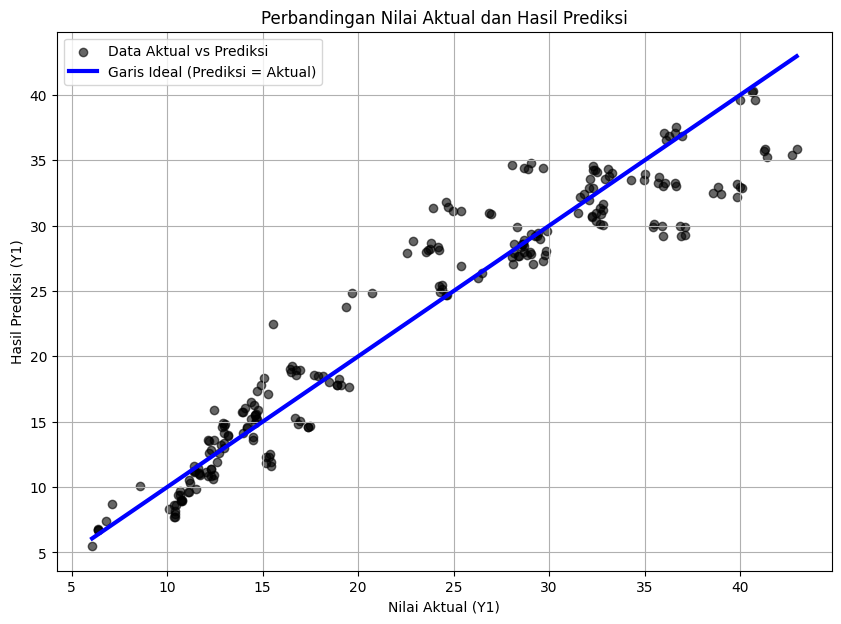

In [181]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, color='black', alpha=0.6, label='Data Aktual vs Prediksi')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=3, label='Garis Ideal (Prediksi = Aktual)')
plt.title('Perbandingan Nilai Aktual dan Hasil Prediksi')
plt.xlabel('Nilai Aktual (Y1)')
plt.ylabel('Hasil Prediksi (Y1)')
plt.legend()
plt.grid(True)
plt.show()

**Perbandingan hasil prediksi dengan nilai aktual**

Kode ini membuat sebuah DataFrame pandas bernama comparison_df yang berisi dua kolom: 'Nilai Aktual' (dari y_test) dan 'Hasil Prediksi' (dari y_pred). Kemudian, kode ini mencetak judul dan lima baris pertama (.head()) dari DataFrame tersebut untuk menampilkan perbandingan awal antara nilai aktual dan hasil prediksi model.

In [182]:
comparison_df = pd.DataFrame({'Nilai Aktual': y_test, 'Hasil Prediksi': y_pred})

print("Perbandingan Nilai Aktual dan Hasil Prediksi:")
display(comparison_df.head())

Perbandingan Nilai Aktual dan Hasil Prediksi:


,Nilai Aktual,Hasil Prediksi
668,16.47,18.769702
324,13.17,13.977185
624,32.82,31.168964
690,41.32,35.897159
473,16.69,15.316830


**6. Analisis dan Kesimpulan**

**Analisis dan Kesimpulan:**
1. Apa makna dari slope dan intercept?
Slope adalah nilai yang menunjukkan

*   Slope adalah nilai yang menunjukkan tingkat perubahan atau gradien dari variabel dependen (Y) untuk setiap kenaikan satu unit pada variabel independen (X).
*   Intercept adalah nilai konstanta yang merepresentasikan titik potong garis regresi dengan sumbu Y, atau dengan kata lain, nilai prediksi Y ketika semua variabel independen (X) bernilai nol.
2. Seberapa baik model memprediksi data?
Berdasarkan scatter plot dan perbandingan yang dilakukan, model regresi linear cukup baik namun belum optimal. Dari grafik terlihat bahwa masih cukup banyak data aktual (titik hitam) yang tersebar cukup jauh dari garis prediksi. Hal ini dibuktikan pula pada tabel perbandingan yang menunjukkan selisih prediksi cukup besar.
3. Apakah ada indikasi overfitting atau underfitting?
Ya, ada indikasi underfitting. Hal ini terjadi karena dalam scatter plot terlihat garis regresi linear lurus dengan cukup banyak titik data tersebar jauh dari garis prediksi baik di atas maupun di bawah.